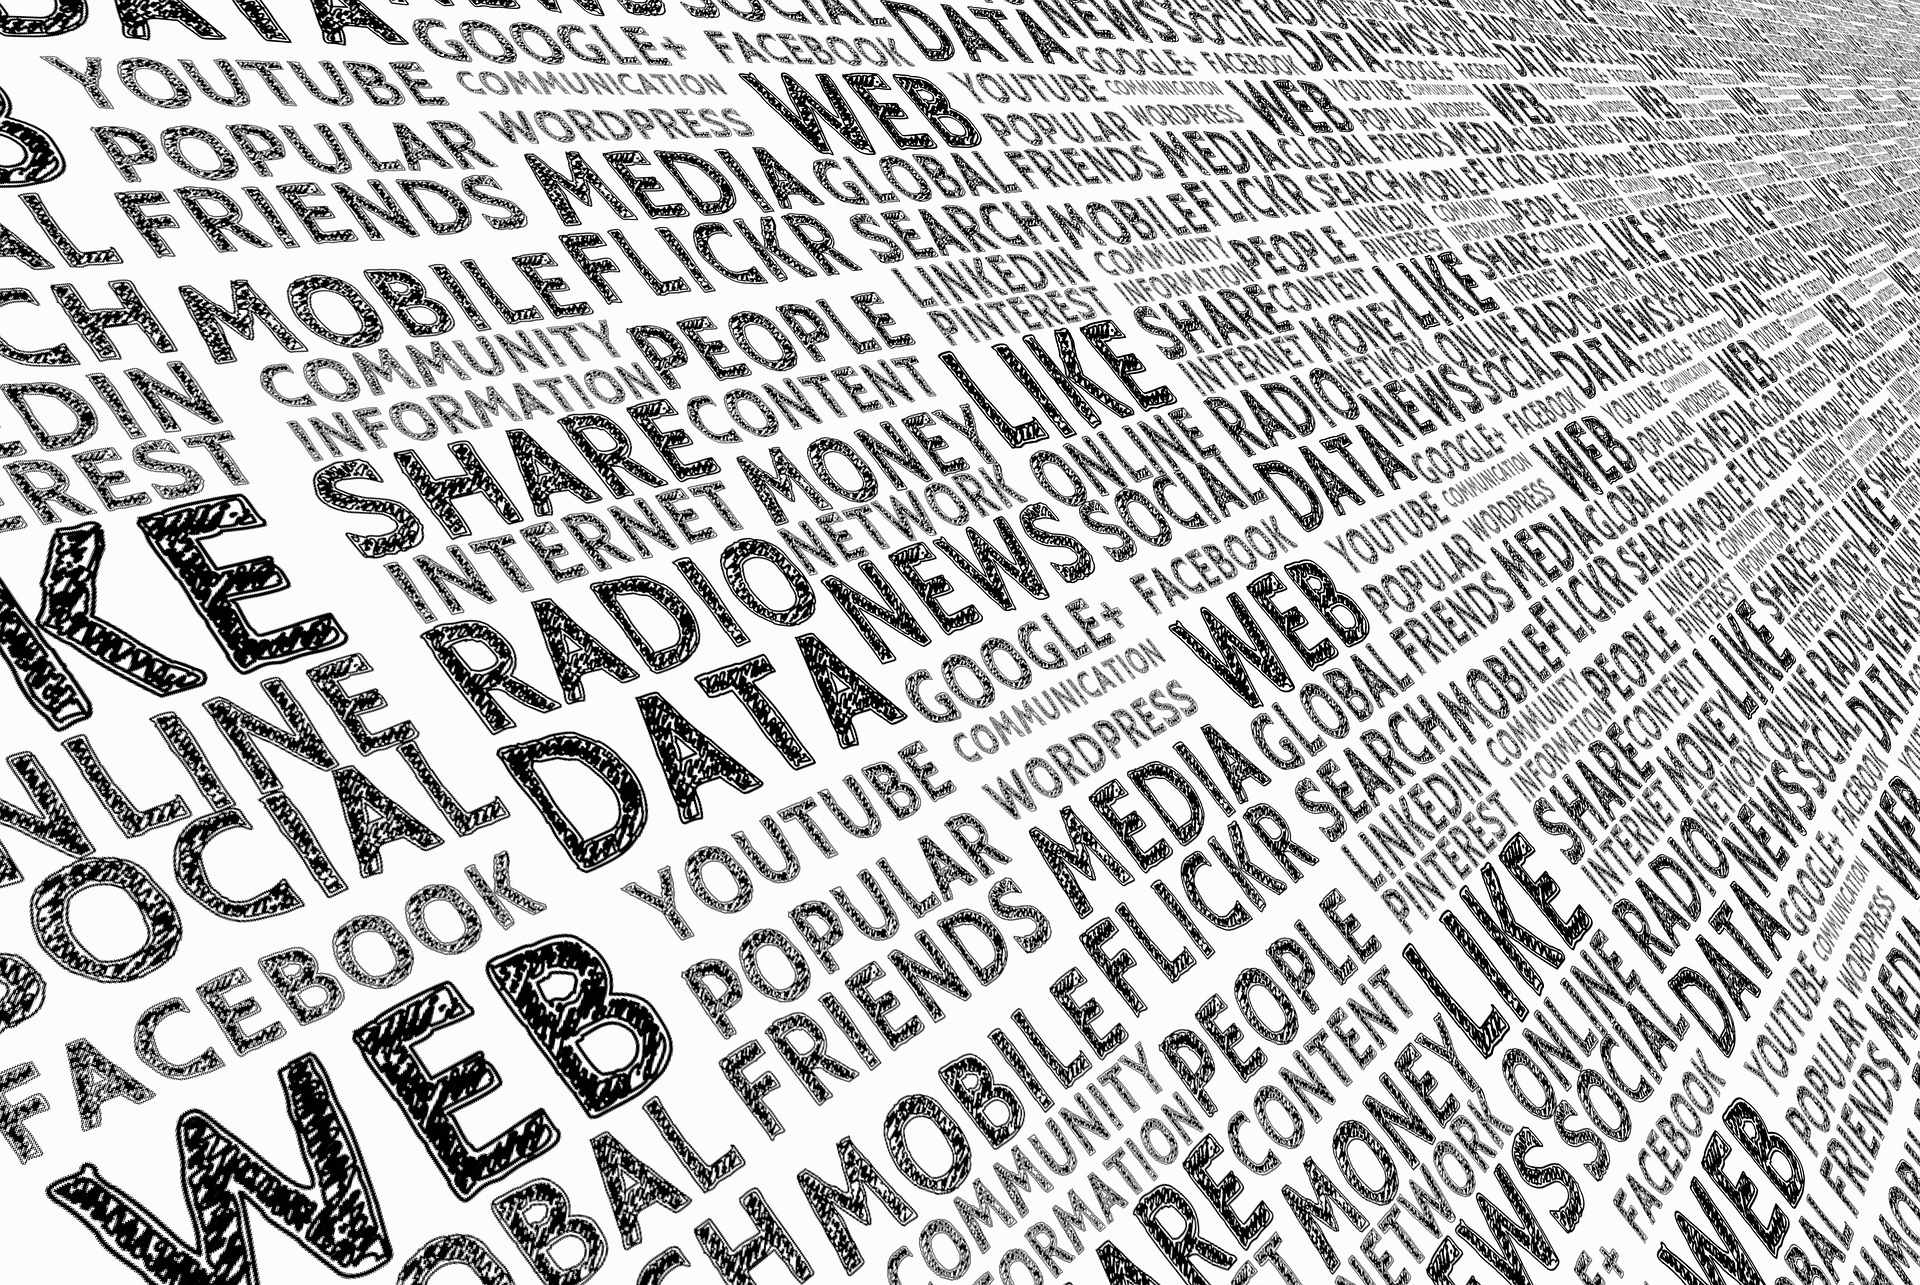

# <center> UDACITY Data Analysis Nanodegree </center> 
## <center> Project:- Wrangle & Analyze Data from WeRateDogs Twitter, Wrangle Report</center>
#### <center> Grant Patience, 29th August 2019 </center>


The task required of us was to wrangle numerous data sources together pertaining to the WeRateDogs Twitter account. This would involve gathering, assessing and identifying data quality and tidiness issues and clean them.

## 1. Gather

There were three data sources Data sources in total, each of a distinct format, location and extraction method; 
- Tweet Archive, 
- Image Predictions, 
- Tweet Information

#### 1.1. Tweet Archive

This file contains basic tweet information of 5000+ Tweets from WeRateDogs. The Tweet Archive data was provided via the UDACITY Project portal as <code>'twitter-archive-enhanced.csv'</code>. This was downloaded manually and stored locally into a Data subfolder within the local project directory.

From there, the file was imported into Python using <code>Pandas</code> and read into a dataframe called <code>twitter_archive</code>.

#### 1.2. Image Predictions

Image Prediction file contained predictions of the Dog Breeds for each image in the Tweet. It was stored online at https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv. 

To extract the information programmatically, the Python <code>requests</code> library was utilised to extract the data via Python using <code>requests.get(url)</code> and saved locally to the Data subfolder in the Project directory as a tsv file called <code>image_predictions.tsv</code>. This was read back into Python for analysis as a <code>Pandas</code> dataframe caled <code>image_predictions</code>

#### 1.3. Additional Data via the Twitter API

The third and final data source pertained to any additional data that could be gleaned from Twitter directly, using Twitters API, most pertinant for analysise was Tweet Favourite and Retweet data. 

To extract the data, first a Twitter Developer account was created to give the necessary access required for the Twitter API. The Pytyhon library <code>tweepy</code> [(http://www.tweepy.org/)](http://www.tweepy.org/) was utilised to extract the data directly from Twitter. Data was extracted into a <code>Pandas</code> dataframe and then saved locally to a JSON file called <code>tweet_json.txt</code> utilising the <code>JSON</code> Pandas library in UTF-8 format.

It was then read back into Python as a <code>Pandas</code> data frame called <code>tweet_data</code>.

### 2. Assess

To assess the data, several approaches were carried out in Python. 

First of all a manual assessment was made on each data frame utilising <code>.shape</code> to determine row count, column count and <code>.columns</code> for the column names. From this we could see roughly what attributes contained nulls, the uniqueness contained within the attribute, the datatype of each attribute. Some of the attributes were incorrectly assigned by Python, and some of the columns were not readable such as 'p1', 'p2' and 'p3'

A manual visual assessment of the data was carried out using <code>.sample(10)</code> so that a snapshot of rows throughout the datasets could be viewed. This identified the usage of columns and certain values such as <code>source</code> attribute being quite unreadable, <code>expanded_url</code> being used to identify retweets.

Delving deeper <code>.info()</code> and <code>.nunique()</code> were used to gather information on the datatypes, and number of unique values in each attribute respectively.  <code>.describe()</code> wa used to programmaticaly assess different statistics of the datasets such as mean, standard deviations and quartile information.

A function <code>missing_values_table</code> was written to programmatically assess the number and % of Null values contained within each attribute in a dataset using <code>isnull().sum()</code>. No Null values were found in <code>image_predictions</code> or <code>tweet_data</code>. Some Nulls were found in <code>twitter_archive</code> but were related to retweet and reply information <code>[in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]</code>.

Duplicate Tweets were identified using <code>tweet_id.duplicated()</code>, which highlighted duplicates in the <code>image_predictions</code> dataframe.

A visual assessment of name values was carried out using <code>.value_counts()</code>, identifying several issues with names including the value of 'None' occuring 745 times, several erroneous names such as 'a', 'the', 'an' and other lowercase words which looked to have been prorammatically picked up from the verbatim of the tet body. 

Contained within the <code>twitter_archive</code> were 4 columns pertaining to the 'stage' or 'class' of a dog; code>[doggo, puppo, floofer, pupper]</code> which could be categorised as one column. Note; it was since discovered that potentially could be multiple dogs in an image, and therefore the tweet could be one or many of each type and not one as assumed.

### 3. Clean

Before cleaning the data, we copied the data to new "clean" versions of the dataframes to work on, independently of the originals.

Erroneous, mistaken, or incorrect dog names were corrected using Python assessments to get a list of the index locations of each affected row,  and we reassessed the text body of the Tweet to find a replacement.

Duplicate rows were dropped using <code>drop_duplicates(inplace=True)</code>

The uneccesary 'doggo', 'floofer', 'pupper' and 'puppo' columns were merged into one column 'dog_stage' by adding the contents to a new column called <code>dog_class</code>.

The three datasets were combined into one using Pandas <code>merge</code> into the 'master' dataset <code>twitter_archive_clean</code>.

Retweets were removed using <code>.dropna</code> on the expanded_urls attribute and unused columns <code>['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']</code> were dropped using <code>.drop</code>.

The <code>source</code> attribute was cleaned down to a readable format using string replace function <code>.str.replace</code>. 

Incorrect datatypes were reassigned to a more appropriate datatype using <code>.astype</code> for dog_class (category), timestamp(datetime), in_reply_to_status_id(string), in_reply_to_user_id(string). While innapropriate column names were renamed using <code>.rename</code> on the Dog Prediction columns <code>{'p1':'Breed_Probability1', 'p2':'Breed_Probability2', 'p3':'Breed_Probability3'}</code>

Incorrectly named dog names 'None' were replaced using <code>replace('None', np.NaN)</code>.

The cleaned dataset was saved to the Data subfolder in the Project directory as <code>'twitter_archive_master.csv'</code> 